In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("RdBu", n_colors=8, desat=1.))
sns.set_style("white")
sns.set_style({'grid.color': '0.95'})
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import os
cwd = os.getcwd()

In [30]:
SAVE = True

## PARAMETERS
U = 16
BETA = 40
MU = 16.7
NA = 4
NY = 5

## DEFINES

NORB = 3
NK = 512
abs_t0 = 0.184

simDir = "../data/kspace/NA" + str(NA) + "-NY" + str(NY) + "/U" + str(U) +\
                 "-BETA" + str(BETA) +\
                 "-MU" + str(MU)

filling = np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[4, 1]
final_gp = np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[5, 1]
it = int(np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[6, 1])
TBbandsUp = np.loadtxt(simDir + "/free-bands-up.csv")
TBbandsDw = np.loadtxt(simDir + "/free-bands-dw.csv")
nUp = np.loadtxt(simDir + "/nUp.csv", delimiter = ',')
nDw = np.loadtxt(simDir + "/nDw.csv", delimiter = ',')
bandsUp = np.loadtxt(simDir +"/bandsUp.csv")
bandsDw = np.loadtxt(simDir +"/bandsDw.csv")
grand_potential = np.loadtxt(simDir +"/grand_potential_evol.csv")

In [31]:
filling

0.78476599999999996

In [32]:
final_gp

-5.6797500000000003

Text(0,0.5,'Grandpotential functional (per site) $[eV]$')

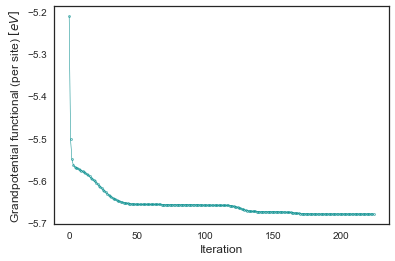

In [33]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(grand_potential[:it],\
        marker = 'o', markersize = 0.5,\
        markeredgewidth = 2, color = 'darkcyan', linewidth = 0.5)
ax.set_xlabel(r'Iteration', fontsize = 12)
ax.set_ylabel(r'Grandpotential functional (per site) $[eV]$',\
fontsize = 12)

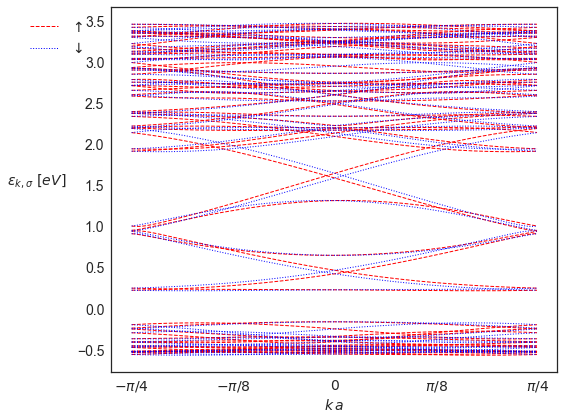

In [34]:
fig = plt.figure(1, figsize = (8, 6))
ax = fig.add_subplot(111)
ks = np.linspace(-np.pi / NA, np.pi / NA, num=NK,\
        endpoint=False)
ax.plot(ks, TBbandsUp, markersize=2,\
linewidth = 1, c = 'r', linestyle = '--', label = r'$\uparrow$')
ax.plot(ks, TBbandsDw, markersize=2,\
linewidth = 1, c = 'b', linestyle = ':', label = r'$\downarrow$')
ax.set_xlabel(r'$k \, a$', fontsize = 14)
ax.set_ylabel(r'$\varepsilon_{k, \sigma} \,\, [eV]$', rotation = 0,\
fontsize = 14, labelpad = 40)
ax.set_xticks([-np.pi / NA, - np.pi / NA / 2, 0,\
np.pi / NA / 2, np.pi / NA])
ax.set_xticklabels([r'$-\pi / ' + str(NA) + '$', r'$-\pi / ' + str(NA * 2) + '$',\
                        r'$0$', r'$\pi / ' + str(NA * 2) + '$', r'$\pi / ' + str(NA) + '$'], fontsize = 14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
ax.legend(bbox_to_anchor=(-0.035, 1), fontsize = 14)
fig.tight_layout()
plt.savefig("tempBands.svg")

0.9097821354 -0.91138601
0.1927567701 0.19175109


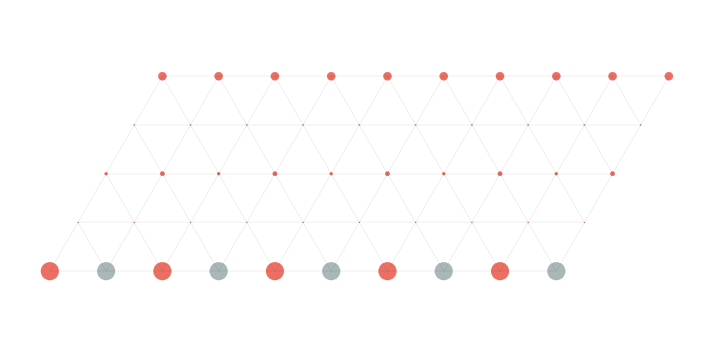

In [27]:
NX=2 * NY
dotscale = 350
fig = plt.figure(1, figsize = (NX, NY))
ax = fig.add_subplot(111)
for i in range(NX - NY + 1):
    ax.plot([i, ( NY - 1 ) * 0.5 + i],\
    [0, ( NY - 1 ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NY - 1 + i , ( NY - 1 ) * 0.5 + i],\
    [0, ( NY - 1 ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
for i in range(1, NY - 1):
    ax.plot([NY - 1 - i , ( NY - 1 - i ) * 0.5],\
    [0, ( NY - 1 - i ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NX - 1 + 0.5 + 0.5 * i,\
    NX - 0.5 * (NY - 1) + i],\
    [np.sqrt(3) / 2 * (1 + i), np.sqrt(3) / 2 * (NY - 1)],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([i + NX - NY + 1,\
    ( NY - 1 ) * 0.5 + i + NX - NY + 1],\
    [0, ( NY - 1 ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NX - 1 + i / 2, i / 2],\
    [i * np.sqrt(3) / 2, i * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - 1 + 0.5, NX - 0.5 * (NY - 1)],\
[np.sqrt(3) / 2, np.sqrt(3) / 2 * (NY - 1)],\
linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - NY + 1,\
( NY - 1 ) * 0.5 + NX - NY + 1],\
[0, ( NY - 1 ) * np.sqrt(3) / 2],\
linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - 1, 0], [0, 0],\
        linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - 1 + (NY - 1) / 2, ( NY - 1 ) / 2],\
[( NY - 1 ) * np.sqrt(3) / 2, ( NY - 1 ) * np.sqrt(3) / 2],\
linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)

clr = np.chararray((NX * NY), itemsize = 10)
a1 = np.arange(NX)
a2 = np.arange(NY)
lat = np.zeros((NX * NY))
vs = np.zeros((NX * NY , 2))
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(NX):
    for j in range(NY):
        vs[NX * j + i, :] =\
        a1[i] * v1 + a2[j] * v2
        a = (i + NA) % NA
        lat[NX * j + i] \
        = ( nUp[NORB * (NY * a + j)]\
        + nUp[1 + NORB * (NY * a + j)]\
        + nUp[2 + NORB * (NY * a + j)]\
        - nDw[NORB * (NY * a + j)]\
        - nDw[1 + NORB * (NY * a + j)]\
        - nDw[2 + NORB * (NY * a + j)])
        if lat[NX * j + i] > 0:
            clr[NX * j + i] = "#e74c3c"
        else:
            clr[NX * j + i] = "#95a5a6"
print(lat[0], lat[1])
print(lat[NX* (NY - 1)], lat[NX* (NY - 1) + 1])

ax.axis('off')
ax.scatter(vs[:, 0], vs[:, 1],\
s = dotscale * abs(lat),\
c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
ax.axis('equal')
ax.set_yticklabels([])
ax.set_xticklabels([])
fig.tight_layout()
if SAVE == True:
    plotDir = "../plots/NA" + str(NA) + "-NY" + str(NY) +"/MU" + str(MU)
    if not os.path.exists(plotDir):
        os.makedirs(plotDir)
    #fig.savefig(plotDir + "/lattice.png", dpi=150)

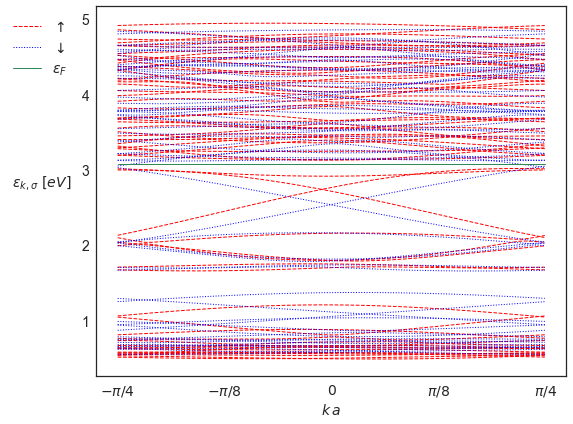

In [28]:
fig = plt.figure(1, figsize = (8, 6))
ax = fig.add_subplot(111)
ks = np.linspace(-np.pi / NA, np.pi / NA, num=NK,\
        endpoint=False)
ax.plot(ks, bandsUp, markersize=2,\
linewidth = 1, c = 'r', linestyle = '--', label = r'$\uparrow$')
ax.plot(ks, bandsDw, markersize=2,\
linewidth = 1, c = 'b', linestyle = ':', label = r'$\downarrow$')
ax.plot(ks, abs_t0*np.ones(NK)*MU,\
c = 'seagreen', linewidth = 1, linestyle = '-', label = r'$\varepsilon_F$')
ax.set_xlabel(r'$k \, a$', fontsize = 14)
ax.set_ylabel(r'$\varepsilon_{k, \sigma} \,\, [eV]$', rotation = 0,\
fontsize = 14, labelpad = 40)
ax.set_xticks([-np.pi / NA, - np.pi / NA / 2, 0,\
np.pi / NA / 2, np.pi / NA])
ax.set_xticklabels([r'$-\pi / ' + str(NA) + '$', r'$-\pi / ' + str(NA * 2) + '$',\
                        r'$0$', r'$\pi / ' + str(NA * 2) + '$', r'$\pi / ' + str(NA) + '$'], fontsize = 14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
ax.legend(bbox_to_anchor=(-0.035, 1), fontsize = 14)
fig.tight_layout()
#plt.savefig("tempBandsUbig.png", dpi = 200)

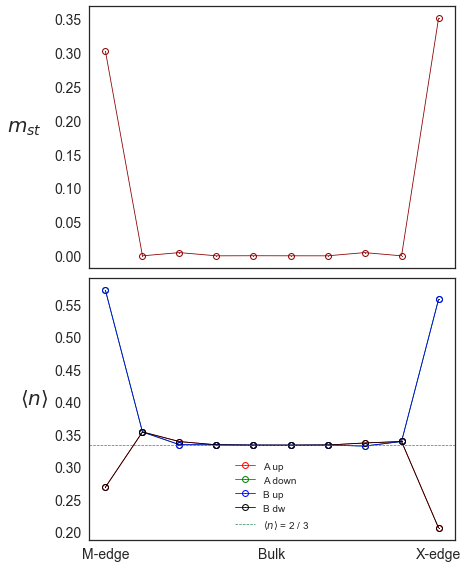

In [124]:
rowFillAup = np.zeros(NY)
rowFillBup = np.zeros(NY)
rowFillAdw = np.zeros(NY)
rowFillBdw = np.zeros(NY)
mSt = np.zeros(NY)

for atom in range(NA):
    for orb in range(NORB):
        for y in range(NY):
            if atom == 0:
                rowFillAup[y] += nUp[orb + NORB * ( NY * atom + y )]
                rowFillAdw[y] += nDw[orb + NORB * ( NY * atom + y )] 
            else:
                rowFillBup[y] += nUp[orb + NORB * ( NY * atom + y )]
                rowFillBdw[y] += nDw[orb + NORB * ( NY * atom + y )] 
            mSt[y] += abs(nUp[orb + NORB * ( NY * atom + y )]\
                          - nDw[orb + NORB * ( NY * atom + y )])

rowFillAup /= NORB
rowFillBup /= NORB
rowFillAdw /= NORB
rowFillBdw /= NORB
mSt /= NA * NORB

fig = plt.figure(2, figsize = (6.5, 8))
ax_mSt = fig.add_subplot(211)
ax = fig.add_subplot(212)


ax.plot(rowFillAup, marker = 'o',\
        markeredgewidth = 6, markersize = 1,\
       linewidth = 0.8, color = 'r', label = 'A up')
ax.plot(rowFillAdw, marker = 'o',\
        markeredgewidth = 6, markersize = 1,\
       linewidth = 0.8, color = 'g', label = 'A down')
ax.plot(rowFillBup, marker = 'o',\
        markeredgewidth = 6, markersize = 1,\
       linewidth = 0.8, color = 'b', label = 'B up')
ax.plot(rowFillBdw, marker = 'o',\
        markeredgewidth = 6, markersize = 1,\
       linewidth = 0.8, color = 'k', label = 'B dw')


ax_mSt.plot(abs(mSt), marker = 'o',\
        markeredgewidth = 6, markersize = 1,\
       linewidth = 0.8, color = 'darkred')

ax.set_xticks([0, int((NY - 1) / 2) + ((NY - 1) % 2)/2, NY - 1])
ax.set_xticklabels([r'M-edge', r'Bulk', r'X-edge'], fontsize = 14)
ax.set_ylabel(r'$\left\langle n \right\rangle$', fontsize = 20,\
              labelpad = 20, rotation = 0)
if NA == 1:
    ax_mSt.set_ylabel(r'$m$', fontsize = 20,\
                  labelpad = 30, rotation = 0)
elif NA == 2:
    ax_mSt.set_ylabel(r'$m_{st}$', fontsize = 20,\
                  labelpad = 30, rotation = 0)
elif NA == 4:
    ax_mSt.set_ylabel(r'$m_{st}^{(di)}$', fontsize = 20,\
                  labelpad = 30, rotation = 0)
ax.tick_params(axis='y', labelsize = 14)
ax_mSt.tick_params(axis='y', labelsize = 14)
ax_mSt.set_xticks([])
ax.axhline(1 / 3, color = 'seagreen', linestyle = '--', linewidth = 0.7,\
           label = r'$\left\langle n \right\rangle$ = 2 / 3')
#ax.set_ylim(0.415, 0.42)
ax.legend()
plt.subplots_adjust(hspace = 0)
fig.tight_layout()
#plt.savefig("tempMagFill.png", dpi = 200)

In [18]:
2 / 3 + 3 / NY / NORB / 2

0.7666666666666666

In [21]:
2.2 / 0.184 - 8

3.9565217391304355